 <table style="width:100%;">
    <tr style="display:none">
        <td></td>
        <td></td>
    </tr>
    <tr style="height:3em">
        <td style="width:20%;align:left"><img src="iut_bordeaux.jpg"></td>
        <td style="width:60%;font: bold 2em 'Fira Sans', serif;text-align:center"> TP  1<br>Table de vérité et crible</td>
        <td style="width:20%;font: bold 1.3em 'Fira Sans', serif;vertical-align:top;">R01.06<i></i></td>
    </tr>
</table>

## Table de vérité

Python possède trois opérateurs booléens : `and`, `or`, `not`.     
On peut composer ces opérateurs pour obtenir des conditions booléennes complexes.  
Par exemple , a et b étant des booléens :

**a and ( b or (not a))** représente la proposition 
$a \wedge ( b \vee \overline a)$.

#### Exercice 1

Tester et comprendre :

```python
a=True
b=False
c = a and (not b)
print(c)
d=not(a or b)
print(d)
for a in [True,False]:
    print(a)
```

#### Exercice 2

Ecrire une fonction `implies` qui prend deux paramètres booléens $a$ et $b$ et retourne le booléen $a \implies b$.

En utilisant deux boucles et cette fonction `ìmplies`, établir la table de vérité de $a \implies b$.

Pour obtenir un affichage correct, se renseigner sur le formatage de chaînes de caractères de Python.


In [10]:
def implies(a,b):
    return (not a) or b

for a in [True,False]:
    for b in [True,False]:
        print(f"|{a:^10}|{b:^10}|{implies(a,b):^10}|")

|    1     |    1     |    1     |
|    1     |    0     |    0     |
|    0     |    1     |    1     |
|    0     |    0     |    1     |


#### Exercice 3

Etablir de même la table de vérité de 
$$ p \iff (q \implies ( r \vee \overline q))$$

In [13]:
def equi(a,b):
    return implies(a,b) and implies(b,a)

def logique(p,q,r):
    return equi(p,implies(q,r or (not q)))
    
for a in [True,False]:
    for b in [True,False]:
        for c in [True,False]:
            print(f"|{a:^10}|{b:^10}|{c:^10}|{logique(a,b,c):^10}|")

|    1     |    1     |    1     |    1     |
|    1     |    1     |    0     |    0     |
|    1     |    0     |    1     |    1     |
|    1     |    0     |    0     |    1     |
|    0     |    1     |    1     |    0     |
|    0     |    1     |    0     |    1     |
|    0     |    0     |    1     |    0     |
|    0     |    0     |    0     |    0     |


## Crible d’Eratosthène.

Le crible d’Eratosthène est un procédé qui permet de trouver tous les nombres premiers inférieurs à un certain entier naturel donné N. 

Cet algorithme procède par élimination :
* On envisage au départ que tous les nombres de 1 à N soient premiers.
* On élimine 0 et 1.
* 2 est encore dans la liste, donc on considère qu’il est premier, mais on élimine de la liste tous ses mutliples.
* 3 est encore dans la liste, donc on considère qu’il est premier, mais on élimine de la liste tous ses mutliples.
* 4 n’est plus dans la liste, car il a été éliminé lors de l’élimination des multiples de 2.
* etc.

En pratique, on s’arrête dès que l’on dépasse $\sqrt{N}$.

1 . Expliquer pourquoi cette condition est valide ?

2 . Créer une fonction python `eratosthene` prenant en argument un nombre N et qui renvoie la liste des nombres premiers jusqu’à N.  

Pour cela :

* Créer une liste de booleens de taille N+1,tous de valeur `True`.
* Mettre d’office les éléments de rang 0 et 1 à `False`.
* Faire tourner l'algorithme à partir de 2.
* Une fois le travail terminé, on affiche les rangs des booléens dont la valeur est `True`.

In [3]:
from math import sqrt


def eratos(N):
    prem=[True for i in range(N+1)]
    prem[0],prem[1]=False,False
    for i in range(2,int(sqrt(N))+1):
        if(prem[i]):
            k=2
            while k*i<=N:
                prem[k*i]=False
                k+=1
    premier=[]      
    return [i for i in range(N+1) if prem[i]]

eratos(10**6)

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97,
 101,
 103,
 107,
 109,
 113,
 127,
 131,
 137,
 139,
 149,
 151,
 157,
 163,
 167,
 173,
 179,
 181,
 191,
 193,
 197,
 199,
 211,
 223,
 227,
 229,
 233,
 239,
 241,
 251,
 257,
 263,
 269,
 271,
 277,
 281,
 283,
 293,
 307,
 311,
 313,
 317,
 331,
 337,
 347,
 349,
 353,
 359,
 367,
 373,
 379,
 383,
 389,
 397,
 401,
 409,
 419,
 421,
 431,
 433,
 439,
 443,
 449,
 457,
 461,
 463,
 467,
 479,
 487,
 491,
 499,
 503,
 509,
 521,
 523,
 541,
 547,
 557,
 563,
 569,
 571,
 577,
 587,
 593,
 599,
 601,
 607,
 613,
 617,
 619,
 631,
 641,
 643,
 647,
 653,
 659,
 661,
 673,
 677,
 683,
 691,
 701,
 709,
 719,
 727,
 733,
 739,
 743,
 751,
 757,
 761,
 769,
 773,
 787,
 797,
 809,
 811,
 821,
 823,
 827,
 829,
 839,
 853,
 857,
 859,
 863,
 877,
 881,
 883,
 887,
 907,
 911,
 919,
 929,
 937,
 941,
 947,
 953,
 967,
 971,
 977,
 983,
 991,
 997,
 1009,
 1013,
 1019,


3 . En utilisant le module `time`, mesurer le temps d'execution de votre fonction `Eratosthene`, pour $N=10^2\cdots 10^6$.   
Ce temps d'execution semble-t'il linéaire par rapport à $N$ ?

In [6]:
import time

def temps(N):
    debut=time.time()
    eratos(N)
    end=time.time()
    return end-debut


En utilisant le module matplotlib.pyplot https://matplotlib.org/stable/tutorials/introductory/pyplot.html, tracer un graphique ayant en abscisse $N$ et en ordonnée le temps d'execution.

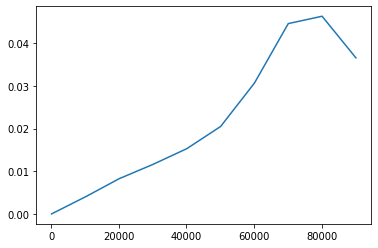

In [18]:
import matplotlib.pyplot as plt 

x=[i for i in range(100,10**5,10000) ]
y=[temps(i) for i in x ]
plt.plot(x,y)
plt.show()

On note $\pi(n)$ le nombre de nombres premiers inférieurs ou égaux à $n$. 

A l'aide de la fonction `Eratosthene`, donner les valeurs de $\pi(n)$ pour $n = 10^2, \ 10^3,\dots 10^6$.

On admet que $\pi(10^9) = 50 847 534$.

Comparer $\pi(n)$ à $\dfrac{n}{\ln(n)}$.  
Présenter les résultats sous forme d'un tableau, puis d'un graphique réalisé avec matplotlib.pyplot.


Ecrire une conjecture sur le nombre de nombres premiers inférieurs à un entier N.